In [1]:
NAME = "PUNTAKARN KAEWSANGHAN"
STUDENT_ID = "61070139"

---

# 1. Classification - Terrorist Attacks

## 1.1 Import Python Library

* Matplotlib
* Pandas
* Shapely
* Seaborn
* GeoPandas
* Numpy
* scikit-learn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pandas as pd
import geopandas as gpd

In [49]:
### Data Visualization Tools ###
from shapely.geometry import Point
from geopandas import GeoDataFrame

### Tools ###
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

### Model Algorithm ###
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

## 1.2 Read .CSV File using Pandas

In [4]:
### Read CSV ###
data = pd.read_csv("../Dataset/gtr_data.csv", low_memory=False)
data

,Unnamed: 0,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,0,201208240006,2012,8,24,NaN,0,NaN,4,Afghanistan,...,One of the targeted soldiers was identified as...,"""Afghan bomb takes Queenstown man's legs,"" The...","""Injured Digger saved by mates,"" Sunday Telegr...","""Afghanistan: Explosion injure 4 Australian tr...",START Primary Collection,-9,-9,1,1,NaN
1,1,200601270007,2006,1,27,NaN,0,NaN,205,Thailand,...,NaN,"“Former Soldier Killed in Restive Thai South,”...",“Thailand Former Army Ranger Killed in Yala Sh...,NaN,CETIS,-9,-9,0,-9,NaN
2,2,199105010008,1991,5,1,NaN,0,NaN,603,United Kingdom,...,NaN,NaN,NaN,NaN,PGIS,0,0,1,1,NaN
3,3,200806110006,2008,6,11,NaN,0,NaN,95,Iraq,...,NaN,"Voices of Iraq, ""Bomb Inside Bus Wounds Four C...","Lexis Nexis, ""Road Bomb in Baghdad Shiite Stro...","Lexis Nexis, ""Security Personnel and Civilians...",ISVG,-9,-9,0,-9,NaN
4,4,201702270011,2017,2,27,NaN,0,NaN,182,Somalia,...,This incident is part of a set of coordinated ...,"""Car bombing injuries five soldiers in Somali ...","""Latest headlines: Somalia: Soldiers injured i...","""Five Somali security officers injured in car ...",START Primary Collection,0,0,0,0,"201702270010, 201702270011"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140823,140823,201607230007,2016,7,22,NaN,0,NaN,153,Pakistan,...,This incident is part of a set of coordinated ...,"""Pakistan: Soldiers Killed, Five Injured in Tw...","""Soldier killed, five wounded in Kalam IED bla...","""Roadside blast in Kalam kills soldier,"" Daily...",START Primary Collection,-9,-9,0,-9,"201607230006, 201607230007"
140824,140824,200601290006,2006,1,29,NaN,0,NaN,186,Sri Lanka,...,NaN,“Relief Workers Abducted in Sri Lanka Despite ...,“Sri Lanka Accuses Tamil Relief Agency of Fail...,“Sri Lanka Denies 5 Tamil Relief Workers were ...,CETIS,-9,-9,0,-9,NaN
140825,140825,197007310001,1970,7,31,NaN,1,1970-08-06 00:00:00.000000,218,Uruguay,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
140826,140826,201511280003,2015,11,28,NaN,0,NaN,4,Afghanistan,...,Casualty numbers for this incident conflict ac...,"""Roundup: Suicide attack in Kabul claims 2 liv...","""One killed, two injured in Kabul blast,"" Afgh...","""Suicide bomber targets Afghan election offici...",START Primary Collection,0,0,0,0,NaN


In [5]:
### Count Group Name ###
data["gname"].value_counts()

Unknown                                        68984
Taliban                                         7066
Islamic State of Iraq and the Levant (ISIL)     4805
Shining Path (SL)                               3194
Al-Shabaab                                      2888
                                               ...  
Sudan Liberation Movement                         14
Armed Revolutionary Nuclei (NAR)                  14
Zebra killers                                     14
Jund al-Khilafah (Tunisia)                        14
Right-Wing Death Squad                            14
Name: gname, Length: 418, dtype: int64

##### 418 Group Name of Terroist

## 1.3 Mark location of Terrorist Attacks on world map using GeoPandas, Shapely, Seaborn

In [6]:
### Select Date and Location use Latitude and Longitude ###
df_location = data[["iyear", "imonth", "iday", "country_txt", "region_txt", "provstate", "latitude", "longitude", "gname"]]
df_location

,iyear,imonth,iday,country_txt,region_txt,provstate,latitude,longitude,gname
0,2012,8,24,Afghanistan,South Asia,Uruzgan,32.927129,66.141526,Unknown
1,2006,1,27,Thailand,Southeast Asia,Yala,6.202025,101.252379,Unknown
2,1991,5,1,United Kingdom,Western Europe,Northern Ireland,54.607712,-5.956210,Irish Republican Army (IRA)
3,2008,6,11,Iraq,Middle East & North Africa,Baghdad,33.303566,44.371773,Unknown
4,2017,2,27,Somalia,Sub-Saharan Africa,Banaadir,2.059818,45.326114,Al-Shabaab
...,...,...,...,...,...,...,...,...,...
140823,2016,7,22,Pakistan,South Asia,Khyber Pakhtunkhwa,35.515375,72.474576,Unknown
140824,2006,1,29,Sri Lanka,South Asia,Eastern,7.716666,81.700188,Unknown
140825,1970,7,31,Uruguay,South America,Montevideo,-34.891151,-56.187214,Tupamaros (Uruguay)
140826,2015,11,28,Afghanistan,South Asia,Kabul,34.516895,69.147014,Taliban


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

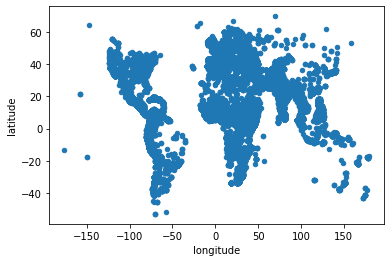

In [7]:
### Scatter Latitude and Longitude ###
df_location.plot(kind='scatter', x='longitude', y='latitude')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


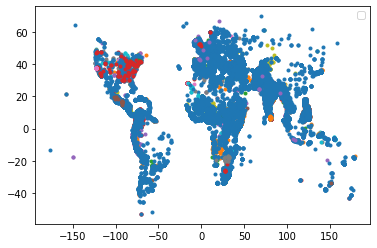

In [8]:
### Group By Group Name ###
groups = df_location.groupby('gname')

### Using Matplotlib ###
for name, group in groups:
    plt.plot(group.longitude, group.latitude, marker='o', linestyle='', markersize=3)

plt.legend()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

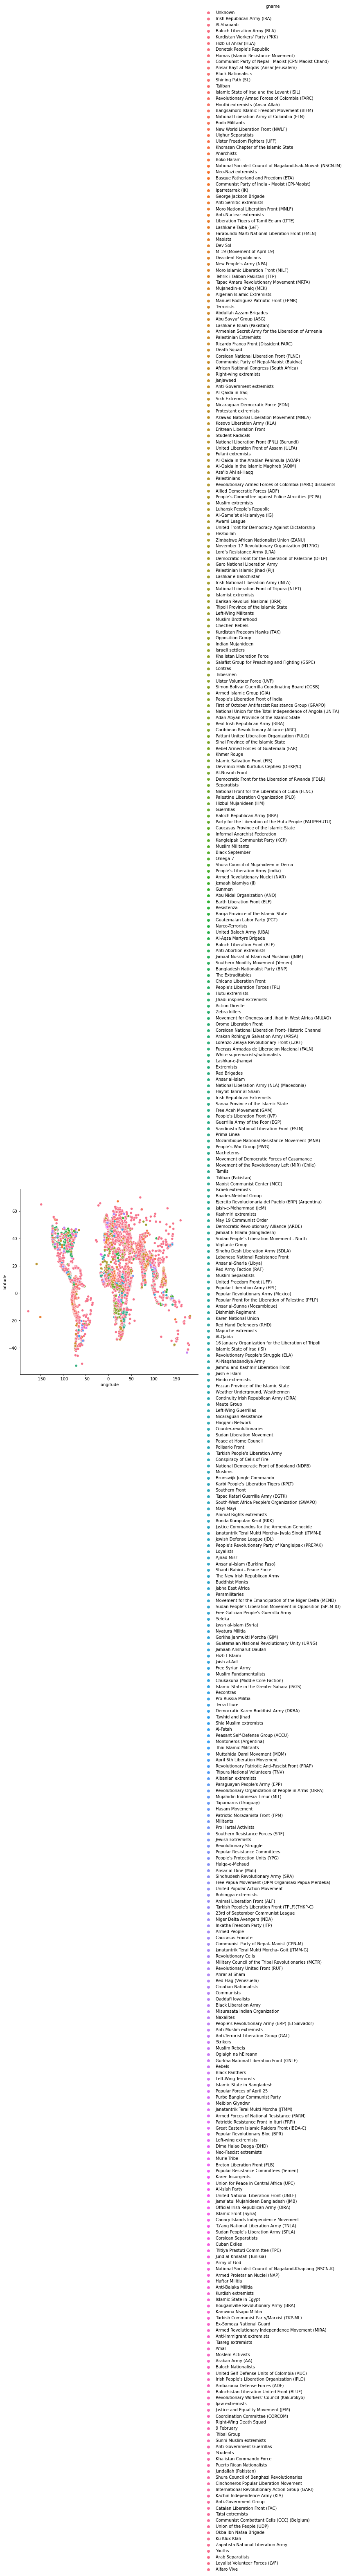

In [9]:
### Using Seaborn ###
sns.pairplot(x_vars=["longitude"], y_vars=["latitude"], data=df_location, hue="gname", height=7)
plt.gca()

<AxesSubplot:>

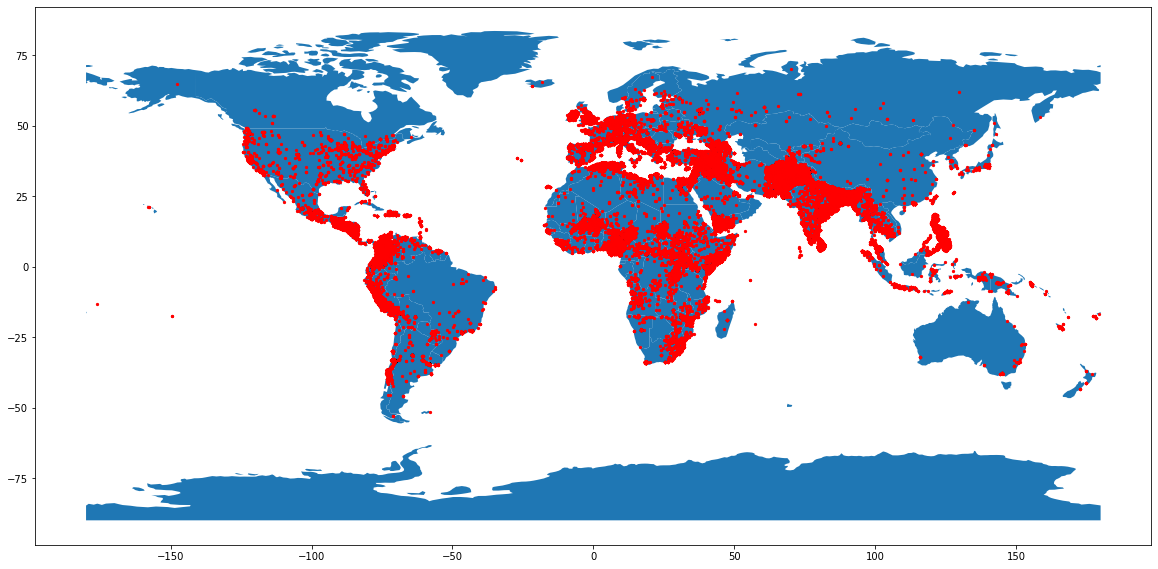

In [10]:
### Create World Map Using GeoPandas ###
geometry = [Point(xy) for xy in zip(df_location['longitude'], df_location['latitude'])]
gdf = GeoDataFrame(df_location, geometry=geometry)   
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(20, 15)), marker='.', color='r', markersize=20)

## 1.4 Select Feature, Label for Training and Validation Dataset

* Location of The Attack (Country, Region, Latitude, Longitude)
* Attack Type
* Target Type
* Weapon Type
* Nationality of Attacker
* Other Number Data

In [11]:
df = data[["country", "region", "latitude", "longitude", "specificity", "attacktype1", "targtype1", "targsubtype1", 
            "natlty1", "weaptype1", "weapsubtype1", "nperps", "nperpcap", "nwound", "INT_LOG", "INT_IDEO", "INT_ANY", "gname"]]
df

,country,region,latitude,longitude,specificity,attacktype1,targtype1,targsubtype1,natlty1,weaptype1,weapsubtype1,nperps,nperpcap,nwound,INT_LOG,INT_IDEO,INT_ANY,gname
0,4,6,32.927129,66.141526,4.0,3,4,37.0,422.0,6,16.0,-99.0,0.0,4.0,-9,-9,1,Unknown
1,205,5,6.202025,101.252379,4.0,2,14,68.0,205.0,5,5.0,2.0,0.0,0.0,-9,-9,-9,Unknown
2,603,8,54.607712,-5.956210,1.0,3,3,23.0,233.0,5,2.0,NaN,NaN,2.0,0,0,1,Irish Republican Army (IRA)
3,95,10,33.303566,44.371773,1.0,3,19,99.0,95.0,6,15.0,-99.0,0.0,10.0,-9,-9,-9,Unknown
4,182,11,2.059818,45.326114,1.0,3,4,36.0,182.0,6,15.0,1.0,0.0,4.0,0,0,0,Al-Shabaab
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140823,153,6,35.515375,72.474576,1.0,3,4,35.0,153.0,6,16.0,-99.0,0.0,2.0,-9,-9,-9,Unknown
140824,186,6,7.716666,81.700188,3.0,6,12,61.0,186.0,13,NaN,NaN,0.0,0.0,-9,-9,-9,Unknown
140825,218,3,-34.891151,-56.187214,1.0,6,7,45.0,217.0,13,NaN,5.0,NaN,NaN,0,1,1,Tupamaros (Uruguay)
140826,4,6,34.516895,69.147014,1.0,3,2,19.0,4.0,6,13.0,1.0,0.0,2.0,0,0,0,Taliban


## 1.5 Summation and Count Null or NaN of values in Dataset

In [12]:
df.isnull().sum()

country             0
region              0
latitude         3263
longitude        3264
specificity         1
attacktype1         0
targtype1           0
targsubtype1     8000
natlty1          1311
weaptype1           0
weapsubtype1    16946
nperps          49769
nperpcap        48590
nwound          13261
INT_LOG             0
INT_IDEO            0
INT_ANY             0
gname               0
dtype: int64

## 1.6 Replace Null or NaN Values with Mean

In [13]:
""" Replace Mean Values Function """
def replace_mean(dataframe):
    
    ### Find Mean of Colum ###
    mean = dataframe.mean()
    ### Replace to Null or NaN Values ###
    df_out = dataframe.fillna(mean)
    
    return df_out

In [14]:
# df3 = df3.apply(lambda col: pd.factorize(col, sort=True)[0])

In [15]:
### Replace and Summation Null Values ###
df = replace_mean(dataframe=df)
df.isnull().sum()

/var/folders/kh/hygzq0vx3r59y4r2pm12l1fw0000gn/T/ipykernel_1298/2499269130.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = dataframe.mean()


country         0
region          0
latitude        0
longitude       0
specificity     0
attacktype1     0
targtype1       0
targsubtype1    0
natlty1         0
weaptype1       0
weapsubtype1    0
nperps          0
nperpcap        0
nwound          0
INT_LOG         0
INT_IDEO        0
INT_ANY         0
gname           0
dtype: int64

## 1.7 Select Feature as $X$ and Labeled Data as $y$

In [16]:
df_X = df[["country", "region", "latitude", "longitude", "specificity", "attacktype1", "targtype1", "targsubtype1", 
            "natlty1", "weaptype1", "weapsubtype1", "nperps", "nperpcap", "nwound", "INT_LOG", "INT_IDEO", "INT_ANY"]]
df_X

,country,region,latitude,longitude,specificity,attacktype1,targtype1,targsubtype1,natlty1,weaptype1,weapsubtype1,nperps,nperpcap,nwound,INT_LOG,INT_IDEO,INT_ANY
0,4,6,32.927129,66.141526,4.0,3,4,37.0,422.0,6,16.000000,-99.000000,0.000000,4.000000,-9,-9,1
1,205,5,6.202025,101.252379,4.0,2,14,68.0,205.0,5,5.000000,2.000000,0.000000,0.000000,-9,-9,-9
2,603,8,54.607712,-5.956210,1.0,3,3,23.0,233.0,5,2.000000,-67.910487,-1.379339,2.000000,0,0,1
3,95,10,33.303566,44.371773,1.0,3,19,99.0,95.0,6,15.000000,-99.000000,0.000000,10.000000,-9,-9,-9
4,182,11,2.059818,45.326114,1.0,3,4,36.0,182.0,6,15.000000,1.000000,0.000000,4.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140823,153,6,35.515375,72.474576,1.0,3,4,35.0,153.0,6,16.000000,-99.000000,0.000000,2.000000,-9,-9,-9
140824,186,6,7.716666,81.700188,3.0,6,12,61.0,186.0,13,11.085759,-67.910487,0.000000,0.000000,-9,-9,-9
140825,218,3,-34.891151,-56.187214,1.0,6,7,45.0,217.0,13,11.085759,5.000000,-1.379339,3.093637,0,1,1
140826,4,6,34.516895,69.147014,1.0,3,2,19.0,4.0,6,13.000000,1.000000,0.000000,2.000000,0,0,0


In [17]:
df_y = df[["gname"]]
df_y

,gname
0,Unknown
1,Unknown
2,Irish Republican Army (IRA)
3,Unknown
4,Al-Shabaab
...,...
140823,Unknown
140824,Unknown
140825,Tupamaros (Uruguay)
140826,Taliban


## 1.8 Count of unique values in a column

In [18]:
for col in df_X:
    print(df[col].nunique(), "------", col)

203 ------ country
12 ------ region
45064 ------ latitude
44959 ------ longitude
6 ------ specificity
9 ------ attacktype1
22 ------ targtype1
113 ------ targsubtype1
210 ------ natlty1
12 ------ weaptype1
31 ------ weapsubtype1
107 ------ nperps
50 ------ nperpcap
212 ------ nwound
3 ------ INT_LOG
3 ------ INT_IDEO
3 ------ INT_ANY


## 1.9 Using Principal Component Analysis (PCA)

In [19]:
def pca_show(df, n):
    n_components = n
    pca = PCA(n_components = df.shape[1]) #Maximum component is all features
    pca.fit_transform(df) #Fitting PCA
    print(f'Eigenvalues = {pca.explained_variance_}') #Explained variance
    print(f'Explaining ratio = {pca.explained_variance_ratio_}')
    
    explain_ratio = pca.explained_variance_ratio_
    explain_ratio_cum = np.cumsum(pca.explained_variance_ratio_)

    #Create blank graph
    plt.figure(figsize = (12, 8))
    ax = plt.axes()
    ax.set_facecolor('#dfe3e6')
    plt.grid(color = 'w')
    plt.xlabel('Number of components')
    plt.ylabel('variance explained')
    plt.title('Scree plot')

    #Plotting
    plt.plot(range(1, explain_ratio.shape[0] + 1), explain_ratio, c = 'royalblue', marker = 'o', linewidth = 2.5, label = 'Individual')
    plt.plot(range(1, explain_ratio.shape[0] + 1), explain_ratio_cum, c = 'firebrick', marker = 'o', linestyle = '--', label = 'Cumulative')

    #Adding values to plot
    for x, ex_ratio, ex_ratio_cum in zip(range(1, explain_ratio.shape[0] + 1),
                                         explain_ratio,
                                         explain_ratio_cum):
      ex_ratio_label = f'{ex_ratio * 100:.2f}%'
      plt.annotate(ex_ratio_label, (x, ex_ratio), textcoords = 'offset points',
                   xytext = (5, 5), ha = 'center')
      ex_ratio_cum_label = f'{ex_ratio_cum * 100:.2f}%'
      plt.annotate(ex_ratio_cum_label, (x, ex_ratio_cum), textcoords = 'offset points',
                   xytext = (5, 5), ha = 'center')

    #Show
    plt.show()

Eigenvalues = [2.30816856e+04 1.69612477e+04 3.85879721e+03 3.04266976e+03
 1.13914614e+03 9.29833147e+02 2.82176186e+02 9.60177944e+01
 5.99578936e+01 3.59297545e+01 7.11338847e+00 6.73344394e+00
 6.31844512e+00 2.73951421e+00 1.39984456e+00 9.24979781e-01
 7.31718791e-02]
Explaining ratio = [4.66176471e-01 3.42563136e-01 7.79354030e-02 6.14522301e-02
 2.30071208e-02 1.87796656e-02 5.69905947e-03 1.93925337e-03
 1.21095832e-03 7.25666509e-04 1.43667772e-04 1.35994104e-04
 1.27612450e-04 5.53294543e-05 2.82723979e-05 1.86816430e-05
 1.47783871e-06]


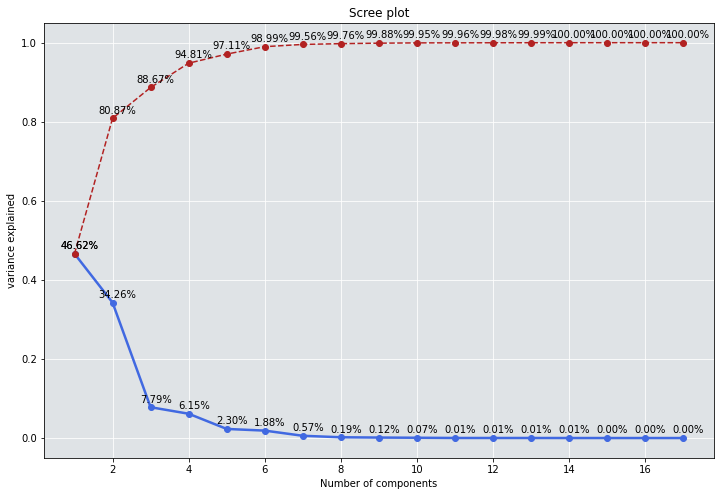

In [21]:
pca_show(df_X, 10)

## 1.10 Data Normalization

In [22]:
""" Min-Max Normalization Function """
def normalise_minmax(X):
    
    """ Min-Max """
    X_max = X.max(axis=0)
    X_min = X.min(axis=0)
    X_norm = (X - X_min) / (X_max - X_min)
    
    return X_norm

In [23]:
""" Standardization Normalization Function """
def normalise_std(X):
    
    """ Standardization """
    X_mean = X.mean()
    X_std = X.std()
    X_norm = (X - X_mean) / X_std
    
    return X_norm

In [24]:
""" Mean Normalization """
def normalise_mean(X):
    
    """ Mean """
    X_mean = X.mean()
    X_max = X.max(axis=0)
    X_min = X.min(axis=0)
    X_norm = (X - X_mean) / (X_max - X_min)
    
    return X_norm

In [25]:
df_X_norm_minmax = normalise_minmax(df_X)
df_X_norm_minmax

,country,region,latitude,longitude,specificity,attacktype1,targtype1,targsubtype1,natlty1,weaptype1,weapsubtype1,nperps,nperpcap,nwound,INT_LOG,INT_IDEO,INT_ANY
0,0.000,0.454545,0.699065,0.681598,0.75,0.250,0.142857,0.321429,0.418,0.416667,0.500000,0.000000,0.267568,0.000368,0.0,0.0,1.0
1,0.201,0.363636,0.482032,0.780359,0.75,0.125,0.619048,0.598214,0.201,0.333333,0.133333,0.005025,0.267568,0.000000,0.0,0.0,0.0
2,0.599,0.636364,0.875132,0.478800,0.00,0.250,0.095238,0.196429,0.229,0.333333,0.033333,0.001547,0.263840,0.000184,0.9,0.9,1.0
3,0.091,0.818182,0.702122,0.620363,0.00,0.250,0.857143,0.875000,0.091,0.416667,0.466667,0.000000,0.267568,0.000919,0.0,0.0,0.0
4,0.178,0.909091,0.448393,0.623048,0.00,0.250,0.142857,0.312500,0.178,0.416667,0.466667,0.004975,0.267568,0.000368,0.9,0.9,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140823,0.149,0.454545,0.720084,0.699412,0.00,0.250,0.142857,0.303571,0.149,0.416667,0.500000,0.000000,0.267568,0.000184,0.0,0.0,0.0
140824,0.182,0.454545,0.494332,0.725362,0.50,0.625,0.523810,0.535714,0.182,1.000000,0.336192,0.001547,0.267568,0.000000,0.0,0.0,0.0
140825,0.214,0.181818,0.148317,0.337509,0.00,0.625,0.285714,0.392857,0.213,1.000000,0.336192,0.005174,0.263840,0.000284,0.9,1.0,1.0
140826,0.000,0.454545,0.711975,0.690052,0.00,0.250,0.047619,0.160714,0.000,0.416667,0.400000,0.004975,0.267568,0.000184,0.9,0.9,0.9


In [26]:
df_X_norm_std = normalise_std(df_X)
df_X_norm_std

,country,region,latitude,longitude,specificity,attacktype1,targtype1,targsubtype1,natlty1,weaptype1,weapsubtype1,nperps,nperpcap,nwound,INT_LOG,INT_IDEO,INT_ANY
0,-1.138797,-0.430676,0.532427,0.649264,2.560754,-0.159829,-0.677334,-0.340813,3.260301,-0.225443,8.090809e-01,-0.204639,0.139388,2.685621e-02,-0.999408,-0.996741,1.040957
1,0.656061,-0.773691,-0.951036,1.276559,2.560754,-0.662541,0.832721,0.697155,0.855327,-0.669165,-1.001960e+00,0.460169,0.139388,-9.166676e-02,-0.999408,-0.996741,-1.094665
2,4.210058,0.255354,1.735878,-0.638842,-0.470373,-0.159829,-0.828340,-0.809573,1.165646,-0.669165,-1.495880e+00,0.000000,0.000000,-3.240528e-02,0.981314,0.942695,1.040957
3,-0.326200,0.941384,0.553323,0.260323,-0.470373,-0.159829,1.587748,1.735123,-0.363785,-0.225443,6.444409e-01,-0.204639,0.139388,2.046407e-01,-0.999408,-0.996741,-1.094665
4,0.450679,1.284399,-1.180963,0.277374,-0.470373,-0.159829,-0.677334,-0.374296,0.600422,-0.225443,6.444409e-01,0.453587,0.139388,2.685621e-02,0.981314,0.942695,0.827395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140823,0.191719,-0.430676,0.676096,0.762411,-0.470373,-0.159829,-0.677334,-0.407779,0.279020,-0.225443,8.090809e-01,-0.204639,0.139388,-3.240528e-02,-0.999408,-0.996741,-1.094665
140824,0.486397,-0.430676,-0.866961,0.927237,1.550378,1.348307,0.530710,0.462775,0.644753,2.880607,2.924595e-16,0.000000,0.139388,-9.166676e-02,-0.999408,-0.996741,-1.094665
140825,0.772146,-1.459721,-3.232046,-1.536276,-0.470373,1.348307,-0.224318,-0.072950,0.988321,2.880607,2.924595e-16,0.479916,0.000000,1.315869e-17,0.981314,1.158188,1.040957
140826,-1.138797,-0.430676,0.620673,0.702961,-0.470373,-0.159829,-0.979345,-0.943504,-1.372322,-0.225443,3.151608e-01,0.453587,0.139388,-3.240528e-02,0.981314,0.942695,0.827395


In [27]:
df_X_norm_mean = normalise_mean(df_X)
df_X_norm_mean

,country,region,latitude,longitude,specificity,attacktype1,targtype1,targsubtype1,natlty1,weaptype1,weapsubtype1,nperps,nperpcap,nwound,INT_LOG,INT_IDEO,INT_ANY
0,-0.12753,-0.114142,0.077895,0.102220,0.633614,-0.039742,-0.213595,-0.090882,0.294176,-0.042339,1.638080e-01,-0.001547,0.003728,8.332073e-05,-0.454111,-0.46254,0.487426
1,0.07347,-0.205051,-0.139138,0.200980,0.633614,-0.164742,0.262596,0.185904,0.077176,-0.125673,-2.028586e-01,0.003478,0.003728,-2.843939e-04,-0.454111,-0.46254,-0.512574
2,0.47147,0.067676,0.253962,-0.100579,-0.116386,-0.039742,-0.261214,-0.215882,0.105176,-0.125673,-3.028586e-01,0.000000,0.000000,-1.005366e-04,0.445889,0.43746,0.487426
3,-0.03653,0.249495,0.080952,0.040985,-0.116386,-0.039742,0.500691,0.462690,-0.032824,-0.042339,1.304747e-01,-0.001547,0.003728,6.348927e-04,-0.454111,-0.46254,-0.512574
4,0.05047,0.340404,-0.172777,0.043669,-0.116386,-0.039742,-0.213595,-0.099810,0.054176,-0.042339,1.304747e-01,0.003429,0.003728,8.332073e-05,0.445889,0.43746,0.387426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140823,0.02147,-0.114142,0.098914,0.120033,-0.116386,-0.039742,-0.213595,-0.108739,0.025176,-0.042339,1.638080e-01,-0.001547,0.003728,-1.005366e-04,-0.454111,-0.46254,-0.512574
140824,0.05447,-0.114142,-0.126838,0.145983,0.383614,0.335258,0.167357,0.123404,0.058176,0.540994,5.921189e-17,0.000000,0.003728,-2.843939e-04,-0.454111,-0.46254,-0.512574
140825,0.08647,-0.386869,-0.472853,-0.241870,-0.116386,0.335258,-0.070738,-0.019453,0.089176,0.540994,5.921189e-17,0.003628,0.000000,4.082453e-20,0.445889,0.53746,0.487426
140826,-0.12753,-0.114142,0.090805,0.110673,-0.116386,-0.039742,-0.308833,-0.251596,-0.123824,-0.042339,6.380803e-02,0.003429,0.003728,-1.005366e-04,0.445889,0.43746,0.387426


## 1.11 Randomly Split The Dataset to Training and Test Sets with Test Size = 0.3

In [28]:
### Train 70% | Test 30% ###
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(df_X_norm_minmax, df_y, test_size=0.3, random_state=42) # For Min-Max Normalise
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df_X_norm_std, df_y, test_size=0.3, random_state=42)    # For Standardization Normalise
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(df_X_norm_mean, df_y, test_size=0.3, random_state=42)   # For Mean Normalise

## 1.12 Evaluation and Selection of Models for Training and Validation

### 1.12.1 K-Nearest Neighbors Algorithm

In [29]:
### Training Model For Min-Max Normalise ###
KNN_model = KNeighborsClassifier(n_neighbors=11, weights='uniform')
KNN_model.fit(X_train_1, y_train_1)

### Report of Training Model ###
y_pred_1 = KNN_model.predict(X_test_1)
print(classification_report(y_test_1, y_pred_1))

/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                              precision    recall  f1-score   support

       16 January Organization for the Liberation of Tripoli       0.23      0.83      0.36         6
                          23rd of September Communist League       0.45      0.56      0.50         9
                                                  9 February       0.00      0.00      0.00         4
                                     Abdullah Azzam Brigades       0.00      0.00      0.00         4
                                Abu Nidal Organization (ANO)       0.00      0.00      0.00        10
                                      Abu Sayyaf Group (ASG)       0.38      0.53      0.44       117
                                              Action Directe       0.00      0.00      0.00         8
                    Adan-Abyan Province of the Islamic State       0.00      0.00      0.00        14
                    African National Congress (South Africa)       0.80      0.81

/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(a

In [30]:
### Training Model For Standardization Normalise ###
KNN_model = KNeighborsClassifier(n_neighbors=11, weights='uniform')
KNN_model.fit(X_train_2, y_train_2)

### Report of Training Model ###
y_pred_2 = KNN_model.predict(X_test_2)
print(classification_report(y_test_2, y_pred_2))

/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/p

                                                              precision    recall  f1-score   support

       16 January Organization for the Liberation of Tripoli       0.28      0.83      0.42         6
                          23rd of September Communist League       0.60      0.33      0.43         9
                                                  9 February       0.00      0.00      0.00         4
                                     Abdullah Azzam Brigades       0.00      0.00      0.00         4
                                Abu Nidal Organization (ANO)       0.33      0.10      0.15        10
                                      Abu Sayyaf Group (ASG)       0.42      0.52      0.46       117
                                              Action Directe       0.00      0.00      0.00         8
                    Adan-Abyan Province of the Islamic State       0.00      0.00      0.00        14
                    African National Congress (South Africa)       0.79      0.86

/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
### Training Model For Mean Normalise ###
KNN_model = KNeighborsClassifier(n_neighbors=11, weights='uniform')
KNN_model.fit(X_train_3, y_train_3)

### Report of Training Model ###
y_pred_3 = KNN_model.predict(X_test_3)
print(classification_report(y_test_3, y_pred_3))

/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                              precision    recall  f1-score   support

       16 January Organization for the Liberation of Tripoli       0.23      0.83      0.36         6
                          23rd of September Communist League       0.45      0.56      0.50         9
                                                  9 February       0.00      0.00      0.00         4
                                     Abdullah Azzam Brigades       0.00      0.00      0.00         4
                                Abu Nidal Organization (ANO)       0.00      0.00      0.00        10
                                      Abu Sayyaf Group (ASG)       0.38      0.53      0.44       117
                                              Action Directe       0.00      0.00      0.00         8
                    Adan-Abyan Province of the Islamic State       0.00      0.00      0.00        14
                    African National Congress (South Africa)       0.80      0.81

/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(a

### 1.12.2 Logistic Regression Algorithm

In [32]:
### Training Model For Min-Max Normalise ###
logisRe = LogisticRegression()
logisRe.fit(X_train_1, y_train_1)

### Report of Training Model ###
y_pred_1 = logisRe.predict(X_test_1)
print(classification_report(y_test_1, y_pred_1))

/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precisio

                                                              precision    recall  f1-score   support

       16 January Organization for the Liberation of Tripoli       0.00      0.00      0.00         6
                          23rd of September Communist League       0.00      0.00      0.00         9
                                                  9 February       0.00      0.00      0.00         4
                                     Abdullah Azzam Brigades       0.00      0.00      0.00         4
                                Abu Nidal Organization (ANO)       0.00      0.00      0.00        10
                                      Abu Sayyaf Group (ASG)       0.00      0.00      0.00       117
                                              Action Directe       0.00      0.00      0.00         8
                    Adan-Abyan Province of the Islamic State       0.00      0.00      0.00        14
                    African National Congress (South Africa)       0.75      0.86

/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
### Training Model For Standardization Normalise ###
logisRe = LogisticRegression()
logisRe.fit(X_train_2, y_train_2)

### Report of Training Model ###
y_pred_2 = logisRe.predict(X_test_2)
print(classification_report(y_test_2, y_pred_2))

/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precisio

                                                              precision    recall  f1-score   support

       16 January Organization for the Liberation of Tripoli       0.00      0.00      0.00         6
                          23rd of September Communist League       0.00      0.00      0.00         9
                                                  9 February       0.00      0.00      0.00         4
                                     Abdullah Azzam Brigades       0.00      0.00      0.00         4
                                Abu Nidal Organization (ANO)       0.00      0.00      0.00        10
                                      Abu Sayyaf Group (ASG)       0.44      0.14      0.21       117
                                              Action Directe       0.00      0.00      0.00         8
                    Adan-Abyan Province of the Islamic State       0.00      0.00      0.00        14
                    African National Congress (South Africa)       0.73      0.88

/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
### Training Model For Mean Normalise ###
logisRe = LogisticRegression()
logisRe.fit(X_train_3, y_train_3)

### Report of Training Model ###
y_pred_3 = logisRe.predict(X_test_3)
print(classification_report(y_test_3, y_pred_3))

/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precisio

                                                              precision    recall  f1-score   support

       16 January Organization for the Liberation of Tripoli       0.00      0.00      0.00         6
                          23rd of September Communist League       0.00      0.00      0.00         9
                                                  9 February       0.00      0.00      0.00         4
                                     Abdullah Azzam Brigades       0.00      0.00      0.00         4
                                Abu Nidal Organization (ANO)       0.00      0.00      0.00        10
                                      Abu Sayyaf Group (ASG)       0.00      0.00      0.00       117
                                              Action Directe       0.00      0.00      0.00         8
                    Adan-Abyan Province of the Islamic State       0.00      0.00      0.00        14
                    African National Congress (South Africa)       0.77      0.82

/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 1.12.3 Decision Tree Algorithm

In [37]:
### Training Model For Min Max Normalise ###
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(X_train_1, y_train_1)

### Report of Training Model ###
y_pred_1 = DecisionTree.predict(X_test_1)
print(classification_report(y_test_1, y_pred_1))

/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                              precision    recall  f1-score   support

       16 January Organization for the Liberation of Tripoli       0.50      0.83      0.62         6
                          23rd of September Communist League       0.62      0.56      0.59         9
                                                  9 February       0.20      0.50      0.29         4
                                     Abdullah Azzam Brigades       0.00      0.00      0.00         4
                                Abu Nidal Organization (ANO)       0.20      0.20      0.20        10
                                      Abu Sayyaf Group (ASG)       0.80      0.88      0.84       117
                                              Action Directe       0.36      0.50      0.42         8
                    Adan-Abyan Province of the Islamic State       0.62      0.57      0.59        14
                    African National Congress (South Africa)       0.96      0.87

/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(a

In [38]:
### Training Model For Standardization Normalise ###
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(X_train_2, y_train_2)

### Report of Training Model ###
y_pred_2 = DecisionTree.predict(X_test_2)
print(classification_report(y_test_2, y_pred_2))

/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                              precision    recall  f1-score   support

       16 January Organization for the Liberation of Tripoli       0.50      0.83      0.62         6
                          23rd of September Communist League       0.62      0.56      0.59         9
                                                  9 February       0.25      0.50      0.33         4
                                     Abdullah Azzam Brigades       0.00      0.00      0.00         4
                                Abu Nidal Organization (ANO)       0.08      0.10      0.09        10
                                      Abu Sayyaf Group (ASG)       0.80      0.86      0.83       117
                                              Action Directe       0.36      0.50      0.42         8
                    Adan-Abyan Province of the Islamic State       0.50      0.50      0.50        14
                    African National Congress (South Africa)       0.95      0.88

/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
### Training Model For Mean Normalise ###
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(X_train_3, y_train_3)

### Report of Training Model ###
y_pred_3 = DecisionTree.predict(X_test_3)
print(classification_report(y_test_3, y_pred_3))

/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                              precision    recall  f1-score   support

       16 January Organization for the Liberation of Tripoli       0.50      0.83      0.62         6
                          23rd of September Communist League       0.71      0.56      0.63         9
                                                  9 February       0.18      0.50      0.27         4
                                     Abdullah Azzam Brigades       0.14      0.25      0.18         4
                                Abu Nidal Organization (ANO)       0.22      0.20      0.21        10
                                      Abu Sayyaf Group (ASG)       0.83      0.85      0.84       117
                                              Action Directe       0.45      0.62      0.53         8
                    Adan-Abyan Province of the Islamic State       0.40      0.43      0.41        14
                    African National Congress (South Africa)       0.94      0.86

/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(a

### 1.12.4 Stochastic Gradient Descent

In [46]:
### Training Model For Min Max Normalise ###
SGD = SGDClassifier()
SGD.fit(X_train_1, y_train_1)

### Report of Training Model ###
y_pred_1 = SGD.predict(X_test_1)
print(classification_report(y_test_1, y_pred_1))

/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                              precision    recall  f1-score   support

       16 January Organization for the Liberation of Tripoli       0.00      0.00      0.00         6
                          23rd of September Communist League       0.00      0.00      0.00         9
                                                  9 February       0.00      0.00      0.00         4
                                     Abdullah Azzam Brigades       0.00      0.00      0.00         4
                                Abu Nidal Organization (ANO)       0.00      0.00      0.00        10
                                      Abu Sayyaf Group (ASG)       0.00      0.00      0.00       117
                                              Action Directe       0.00      0.00      0.00         8
                    Adan-Abyan Province of the Islamic State       0.00      0.00      0.00        14
                    African National Congress (South Africa)       0.85      0.12

/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
### Training Model For Standardization Normalise ###
SGD = SGDClassifier()
SGD.fit(X_train_2, y_train_2)

### Report of Training Model ###
y_pred_2 = SGD.predict(X_test_2)
print(classification_report(y_test_2, y_pred_2))

/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                              precision    recall  f1-score   support

       16 January Organization for the Liberation of Tripoli       0.00      0.00      0.00         6
                          23rd of September Communist League       0.00      0.00      0.00         9
                                                  9 February       0.00      0.00      0.00         4
                                     Abdullah Azzam Brigades       0.00      0.00      0.00         4
                                Abu Nidal Organization (ANO)       0.00      0.00      0.00        10
                                      Abu Sayyaf Group (ASG)       0.00      0.00      0.00       117
                                              Action Directe       0.00      0.00      0.00         8
                    Adan-Abyan Province of the Islamic State       0.00      0.00      0.00        14
                    African National Congress (South Africa)       0.84      0.78

/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
### Training Model For Mean Normalise ###
SGD = SGDClassifier()
SGD.fit(X_train_3, y_train_3)

### Report of Training Model ###
y_pred_3 = SGD.predict(X_test_3)
print(classification_report(y_test_3, y_pred_3))

/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                              precision    recall  f1-score   support

       16 January Organization for the Liberation of Tripoli       0.00      0.00      0.00         6
                          23rd of September Communist League       0.00      0.00      0.00         9
                                                  9 February       0.00      0.00      0.00         4
                                     Abdullah Azzam Brigades       0.00      0.00      0.00         4
                                Abu Nidal Organization (ANO)       0.00      0.00      0.00        10
                                      Abu Sayyaf Group (ASG)       0.00      0.00      0.00       117
                                              Action Directe       0.00      0.00      0.00         8
                    Adan-Abyan Province of the Islamic State       0.00      0.00      0.00        14
                    African National Congress (South Africa)       0.77      0.19

/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 1.12.5 Random Forest Algorithm

In [50]:
### Training Model For Min Max Normalise ###
RandomForest = RandomForestClassifier()
RandomForest.fit(X_train_1, y_train_1)

### Report of Training Model ###
y_pred_1 = RandomForest.predict(X_test_1)
print(classification_report(y_test_1, y_pred_1))

/var/folders/kh/hygzq0vx3r59y4r2pm12l1fw0000gn/T/ipykernel_1298/3744704282.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForest.fit(X_train_1, y_train_1)
/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/puntakarnkaewsanghan/San

                                                              precision    recall  f1-score   support

       16 January Organization for the Liberation of Tripoli       0.60      1.00      0.75         6
                          23rd of September Communist League       0.67      0.67      0.67         9
                                                  9 February       0.25      0.25      0.25         4
                                     Abdullah Azzam Brigades       0.00      0.00      0.00         4
                                Abu Nidal Organization (ANO)       0.20      0.10      0.13        10
                                      Abu Sayyaf Group (ASG)       0.87      0.92      0.90       117
                                              Action Directe       0.45      0.62      0.53         8
                    Adan-Abyan Province of the Islamic State       0.78      0.50      0.61        14
                    African National Congress (South Africa)       0.96      0.93

/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
### Training Model For Standardization Normalise ###
RandomForest = RandomForestClassifier()
RandomForest.fit(X_train_2, y_train_2)

### Report of Training Model ###
y_pred_2 = RandomForest.predict(X_test_2)
print(classification_report(y_test_2, y_pred_2))

/var/folders/kh/hygzq0vx3r59y4r2pm12l1fw0000gn/T/ipykernel_1298/3583478119.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForest.fit(X_train_2, y_train_2)
/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/puntakarnkaewsanghan/San

                                                              precision    recall  f1-score   support

       16 January Organization for the Liberation of Tripoli       0.60      1.00      0.75         6
                          23rd of September Communist League       0.67      0.67      0.67         9
                                                  9 February       0.33      0.50      0.40         4
                                     Abdullah Azzam Brigades       0.00      0.00      0.00         4
                                Abu Nidal Organization (ANO)       0.20      0.10      0.13        10
                                      Abu Sayyaf Group (ASG)       0.84      0.92      0.88       117
                                              Action Directe       0.40      0.50      0.44         8
                    Adan-Abyan Province of the Islamic State       0.78      0.50      0.61        14
                    African National Congress (South Africa)       0.96      0.91

/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
### Training Model For Mean Normalise ###
RandomForest = RandomForestClassifier()
RandomForest.fit(X_train_3, y_train_3)

### Report of Training Model ###
y_pred_3 = RandomForest.predict(X_test_3)
print(classification_report(y_test_3, y_pred_3))

/var/folders/kh/hygzq0vx3r59y4r2pm12l1fw0000gn/T/ipykernel_1298/1047502354.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForest.fit(X_train_3, y_train_3)
/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/puntakarnkaewsanghan/San

                                                              precision    recall  f1-score   support

       16 January Organization for the Liberation of Tripoli       0.60      1.00      0.75         6
                          23rd of September Communist League       0.60      0.67      0.63         9
                                                  9 February       0.33      0.25      0.29         4
                                     Abdullah Azzam Brigades       0.00      0.00      0.00         4
                                Abu Nidal Organization (ANO)       0.20      0.10      0.13        10
                                      Abu Sayyaf Group (ASG)       0.86      0.93      0.89       117
                                              Action Directe       0.45      0.62      0.53         8
                    Adan-Abyan Province of the Islamic State       0.88      0.50      0.64        14
                    African National Congress (South Africa)       0.96      0.91

/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/puntakarnkaewsanghan/Sandbox/ML-Code/mlenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 1.13 Model Testing with Test Dataset

In [64]:
### Read CSV File ###
test_data = pd.read_csv("../Dataset/test.csv", low_memory=False)

In [65]:
### Select Features ###
test_X = test_data[["country", "region", "latitude", "longitude", "specificity", "attacktype1", "targtype1", "targsubtype1", 
            "natlty1", "weaptype1", "weapsubtype1", "nperps", "nperpcap", "nwound", "INT_LOG", "INT_IDEO", "INT_ANY"]]
test_X

,country,region,latitude,longitude,specificity,attacktype1,targtype1,targsubtype1,natlty1,weaptype1,weapsubtype1,nperps,nperpcap,nwound,INT_LOG,INT_IDEO,INT_ANY
0,95,10,33.303566,44.371773,1.0,3,14,73.0,95.0,6,15.0,NaN,NaN,5.0,-9,-9,-9
1,36,5,NaN,NaN,5.0,3,19,100.0,36.0,6,8.0,NaN,NaN,0.0,0,0,0
2,1003,9,42.741180,20.319870,1.0,2,14,71.0,175.0,5,5.0,NaN,0.0,1.0,0,1,1
3,200,10,33.515242,36.292083,1.0,3,14,79.0,200.0,6,11.0,-99.0,0.0,0.0,-9,-9,-9
4,95,10,35.326122,43.780810,1.0,9,14,67.0,95.0,13,NaN,-99.0,0.0,0.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60350,95,10,33.633895,42.832080,1.0,3,3,25.0,95.0,6,17.0,-99.0,0.0,4.0,0,1,1
60351,4,6,35.264813,62.999505,1.0,9,3,22.0,4.0,13,NaN,-99.0,0.0,NaN,0,0,0
60352,95,10,33.303566,44.371773,1.0,3,3,22.0,95.0,6,15.0,1.0,0.0,25.0,-9,-9,-9
60353,92,6,26.583446,84.279156,1.0,2,14,67.0,92.0,13,NaN,-99.0,0.0,10.0,0,0,0


In [66]:
### Summation Null or NaN ###
test_X.isnull().sum()

country             0
region              0
latitude         1364
longitude        1364
specificity         0
attacktype1         0
targtype1           0
targsubtype1     3454
natlty1           539
weaptype1           0
weapsubtype1     7229
nperps          21326
nperpcap        20884
nwound           5663
INT_LOG             0
INT_IDEO            0
INT_ANY             0
dtype: int64

In [67]:
### Replace Null or NaN Values with Mean ###
test_X = replace_mean(dataframe=test_X)
test_X.isnull().sum()

country         0
region          0
latitude        0
longitude       0
specificity     0
attacktype1     0
targtype1       0
targsubtype1    0
natlty1         0
weaptype1       0
weapsubtype1    0
nperps          0
nperpcap        0
nwound          0
INT_LOG         0
INT_IDEO        0
INT_ANY         0
dtype: int64

In [68]:
### Standardization Normalise ###
test_X = normalise_std(test_X)
test_X

,country,region,latitude,longitude,specificity,attacktype1,targtype1,targsubtype1,natlty1,weaptype1,weapsubtype1,nperps,nperpcap,nwound,INT_LOG,INT_IDEO,INT_ANY
0,-0.324419,0.944370,0.549644,2.616504e-01,-0.471721,-0.154829,0.837876,0.873332,-0.361439,-0.226015,0.640529,7.844462e-17,0.000000,0.035266,-0.999279,-0.996649,-1.091871
1,-0.852324,-0.772059,0.000000,6.356260e-17,3.585236,-0.154829,1.593407,1.779791,-1.011955,-0.226015,-0.507213,7.844462e-17,0.000000,-0.062777,0.981242,0.942747,0.829962
2,7.799942,0.601084,1.073696,-1.686689e-01,-0.471721,-0.657557,0.837876,0.806187,0.520617,-0.669025,-0.999103,7.844462e-17,0.140260,-0.043169,0.981242,1.158236,1.043499
3,0.615072,0.944370,0.561398,1.170944e-01,-0.471721,-0.154829,0.837876,1.074768,0.796260,-0.226015,-0.015324,-1.752828e-01,0.140260,-0.062777,-0.999279,-0.996649,-1.091871
4,-0.324419,0.944370,0.661953,2.510774e-01,-0.471721,2.861538,0.837876,0.671897,-0.361439,2.875052,0.000000,-1.752828e-01,0.140260,-0.062777,0.981242,1.158236,1.043499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60350,-0.324419,0.944370,0.567987,2.341034e-01,-0.471721,-0.154829,-0.824293,-0.738150,-0.361439,-0.226015,0.968456,-1.752828e-01,0.140260,0.015657,0.981242,1.158236,1.043499
60351,-1.138645,-0.428773,0.658548,5.949245e-01,-0.471721,2.861538,-0.824293,-0.838868,-1.364777,2.875052,0.000000,-1.752828e-01,0.140260,0.000000,0.981242,0.942747,0.829962
60352,-0.324419,0.944370,0.549644,2.616504e-01,-0.471721,-0.154829,-0.824293,-0.838868,-0.361439,-0.226015,0.640529,3.767221e-01,0.140260,0.427440,-0.999279,-0.996649,-1.091871
60353,-0.351262,-0.428773,0.176489,9.756447e-01,-0.471721,-0.657557,0.837876,0.671897,-0.394516,2.875052,0.000000,-1.752828e-01,0.140260,0.133309,0.981242,0.942747,0.829962


In [70]:
### Rredict Testset By Random Forest ###
test_y_pred = RandomForest.predict(test_X)

In [71]:
### Create Answer as Data Frame ###
d = {'Index': np.arange(len(test_y_pred)), 'Category': test_y_pred}
df_ans = pd.DataFrame(data=d)
df_ans

,Index,Category
0,0,Unknown
1,1,Khmer Rouge
2,2,Kosovo Liberation Army (KLA)
3,3,Unknown
4,4,Islamic State of Iraq and the Levant (ISIL)
...,...,...
60350,60350,Islamic State of Iraq and the Levant (ISIL)
60351,60351,Taliban
60352,60352,Unknown
60353,60353,Communist Party of India - Maoist (CPI-Maoist)


In [72]:
### Count Value of Group Name as Labeled ###
df_ans["Category"].value_counts()

Unknown                                        30832
Taliban                                         3087
Islamic State of Iraq and the Levant (ISIL)     2134
Shining Path (SL)                               1510
Al-Shabaab                                      1276
                                               ...  
Sudan Liberation Movement                          1
Muslim Rebels                                      1
Students                                           1
9 February                                         1
Paramilitaries                                     1
Name: Category, Length: 393, dtype: int64

In [73]:
### Save Data Frame to .CSV File ###
df_ans.to_csv("Classification_61070139-62070247-62070275.csv", encoding='utf-8', index=False)